In [113]:
#Importing Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory

import os

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
import pandas as pd
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [116]:
test=pd.read_csv(r'C:\Users\w7151998\Documents\Research\Atttrition\input\employee_attrition_test_2.csv')
train=pd.read_csv(r'C:\Users\w7151998\Documents\Research\Atttrition\input\employee_attrition_train_2.csv')

In [117]:
df = pd.concat([train, test], axis=0)
df.reset_index(drop=True, inplace=True)

# INFO

In [118]:
df.head()

,EntityNo,Name,Age,WorkModel,DailyRate,Department,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,7.789991e+09,Thabo Nkosi,50.0,High-flex Hybrid,1246.0,Corporate Services,12.0,3,1,Male,5,Manager,2,Single,18200,1,No,11,3,1,32,2,3,32,5,10,7,No
1,7.611430e+09,Nomvula Zulu,34.0,Remote,829.0,Corporate Services,45.0,2,3,Male,1,Human Resources,4,Single,3737,0,No,19,3,1,4,1,1,3,2,0,2,No
2,1.816518e+09,Sipho Mandela,NaN,Remote,1146.0,Corporate Services,26.0,4,3,Female,3,Human Resources,4,Single,8837,1,Yes,16,3,0,9,2,3,9,0,1,7,No
3,6.916751e+09,Lerato Mkhize,51.0,Remote,770.0,Corporate Services,20.0,3,3,Male,4,Manager,2,Divorced,14026,1,Yes,11,3,1,33,2,3,33,9,0,10,No
4,5.732908e+09,Bongani Khumalo,NaN,Remote,1169.0,Corporate Services,8.0,2,2,Male,1,Human Resources,4,Divorced,4936,1,No,13,3,1,6,6,3,5,1,0,4,No


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1029 entries, 0 to 1028
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EntityNo                 531 non-null    float64
 1   Name                     531 non-null    object 
 2   Age                      901 non-null    float64
 3   WorkModel                1029 non-null   object 
 4   DailyRate                1002 non-null   float64
 5   Department               1029 non-null   object 
 6   DistanceFromHome         946 non-null    float64
 7   Education                1029 non-null   int64  
 8   EnvironmentSatisfaction  1029 non-null   int64  
 9   Gender                   1029 non-null   object 
 10  JobLevel                 1029 non-null   int64  
 11  JobRole                  1029 non-null   object 
 12  JobSatisfaction          1029 non-null   int64  
 13  MaritalStatus            1024 non-null   object 
 14  MonthlyIncome           

In [120]:
round((df.isnull().sum()/df.shape[0]*100),2)
# we have very less amount of null values

EntityNo                   48.40
Name                       48.40
Age                        12.44
WorkModel                   0.00
DailyRate                   2.62
Department                  0.00
DistanceFromHome            8.07
Education                   0.00
EnvironmentSatisfaction     0.00
Gender                      0.00
JobLevel                    0.00
JobRole                     0.00
JobSatisfaction             0.00
MaritalStatus               0.49
MonthlyIncome               0.00
NumCompaniesWorked          0.00
OverTime                    0.00
PercentSalaryHike           0.00
PerformanceRating           0.00
StockOptionLevel            0.00
TotalWorkingYears           0.00
TrainingTimesLastYear       0.00
WorkLifeBalance             0.00
YearsAtCompany              0.00
YearsInCurrentRole          0.00
YearsSinceLastPromotion     0.00
YearsWithCurrManager        0.00
Attrition                   0.00
dtype: float64

In [121]:
df.describe()

,EntityNo,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,5.310000e+02,901.000000,1002.000000,946.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000
mean,5.424344e+09,37.859046,800.528942,11.143763,2.892128,2.683188,2.043732,2.712342,6449.796890,2.653061,15.260447,3.159378,0.822157,11.196307,2.782313,2.748299,6.942663,4.215743,2.119534,4.005831
std,2.658806e+09,9.443228,408.109828,9.604697,1.053541,1.096829,1.118918,1.096889,4794.525367,2.508186,3.665779,0.366206,0.874662,7.857581,1.283401,0.697278,6.068322,3.658595,3.108651,3.522574
min,7.899912e+08,18.000000,102.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,11.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,3.077400e+09,31.000000,458.250000,2.000000,2.000000,2.000000,1.000000,2.000000,2814.000000,1.000000,12.000000,3.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,5.474733e+09,37.000000,801.500000,9.000000,3.000000,3.000000,2.000000,3.000000,4735.000000,1.000000,14.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,7.633758e+09,44.000000,1162.000000,18.000000,4.000000,4.000000,3.000000,4.000000,8446.000000,4.000000,18.000000,3.000000,1.000000,15.000000,3.000000,3.000000,10.000000,7.000000,2.000000,7.000000
max,9.930864e+09,60.000000,1496.000000,53.000000,5.000000,4.000000,5.000000,4.000000,19999.000000,9.000000,25.000000,4.000000,3.000000,40.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


In [122]:
#single=['StandardHours','EmployeeCount','Over18']
#for i in single:
#    print(df[i].value_counts())

In [123]:
#df.drop(single,axis=1,inplace=True)
df.drop(['EntityNo','Name'],axis=1,inplace=True)

In [124]:
df.dropna(inplace=True)

In [125]:
obj=df.select_dtypes(include=['object'])
for i in obj.columns:
    print(df[i].value_counts())
    print('----------------------\n')
    

Remote                221
High-flex Hybrid      206
Medium-flex Hybrid    154
Fully office based    109
Fully Remote           80
Low - flex hybrid      20
Field - Force           5
Name: WorkModel, dtype: int64
----------------------

ExploreEdge Bank                  483
Marketing Sales & Distribution    230
Corporate Services                 35
Vitality RSA                       14
ExploreEdge Connect                13
ExploreEdge Central Services       11
ExploreEdge Life                    9
Name: Department, dtype: int64
----------------------

Male      472
Female    323
Name: Gender, dtype: int64
----------------------

Sales Executive              164
Research Scientist           159
Laboratory Technician        131
Manufacturing Director        79
Manager                       65
Healthcare Representative     63
Research Director             56
Sales Representative          51
Human Resources               27
Name: JobRole, dtype: int64
----------------------

Married     339

# EDA

Text(0.5, 1.0, 'Attrition Distribution')

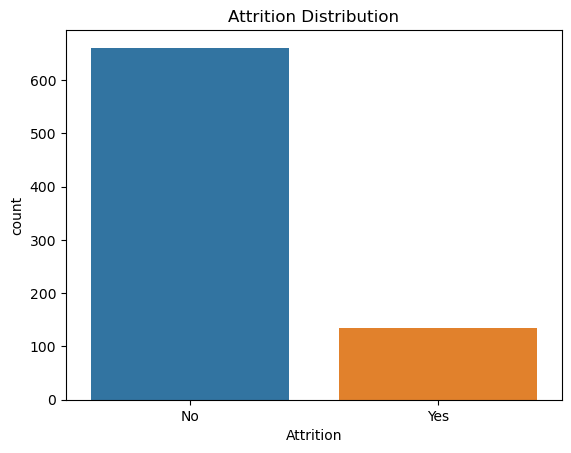

In [126]:
sns.countplot(x='Attrition',data=df)
plt.title('Attrition Distribution')
# Imbalanced data

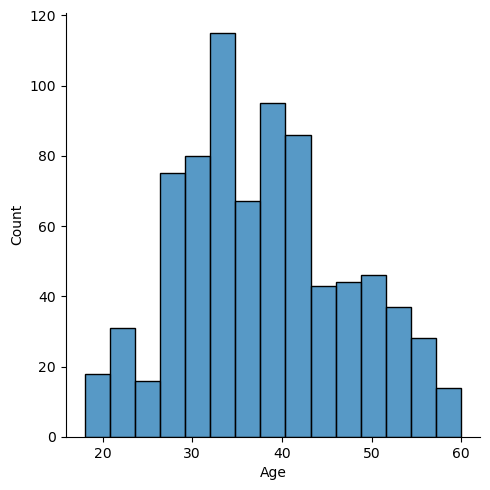

In [127]:
sns.displot(df['Age'])

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Remote'),
  Text(1, 0, 'High-flex Hybrid'),
  Text(2, 0, 'Medium-flex Hybrid'),
  Text(3, 0, 'Fully office based'),
  Text(4, 0, 'Fully Remote'),
  Text(5, 0, 'Low - flex hybrid'),
  Text(6, 0, 'Field - Force')])

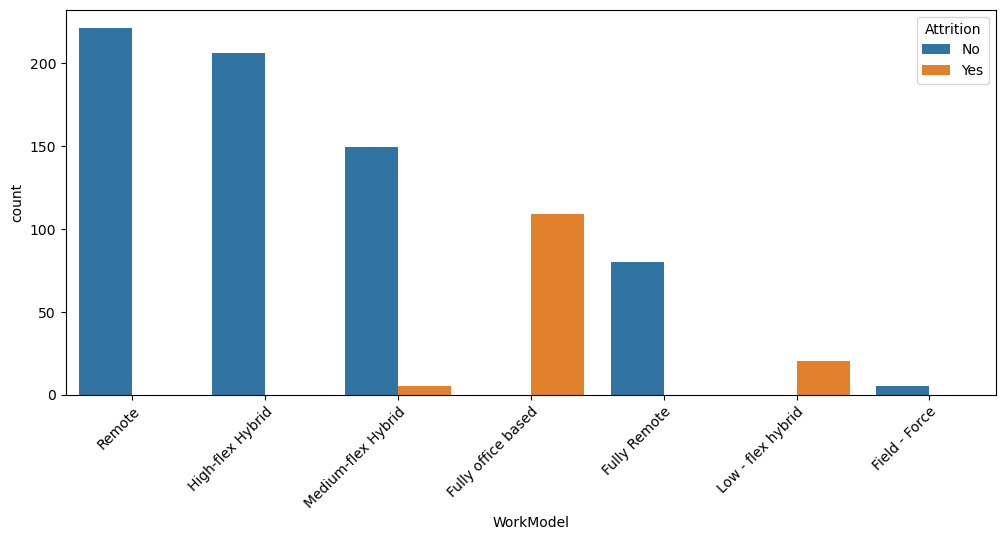

In [128]:
plt.figure(figsize=(12, 5)) 
order = df['WorkModel'].value_counts().index
sns.countplot(x='WorkModel',hue='Attrition',data=df, order=order)
plt.xticks(rotation=45, ha='right', wrap=True)

#Most frequently, Travel Employees leave the company

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'ExploreEdge Bank'),
  Text(1, 0, 'Marketing Sales & Distribution'),
  Text(2, 0, 'Corporate Services'),
  Text(3, 0, 'Vitality RSA'),
  Text(4, 0, 'ExploreEdge Connect'),
  Text(5, 0, 'ExploreEdge Central Services'),
  Text(6, 0, 'ExploreEdge Life')])

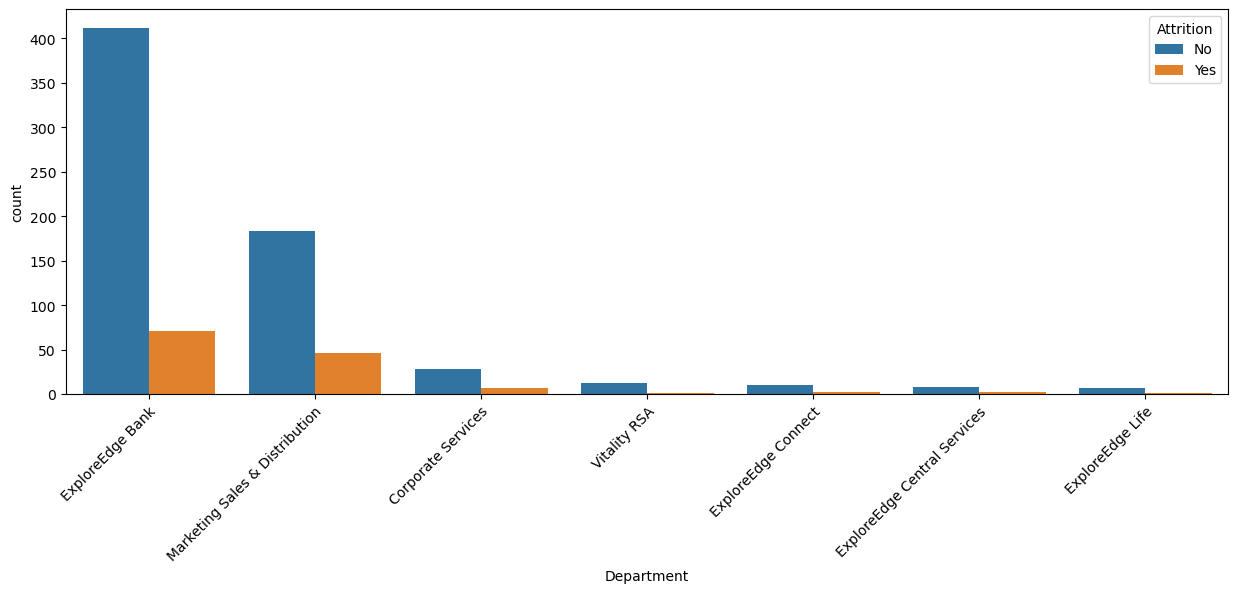

In [129]:
plt.figure(figsize=(15, 5)) 
order = df['Department'].value_counts().index
sns.countplot(x='Department',data=df,hue='Attrition', order=order)
plt.xticks(rotation=45, ha='right', wrap=True)

#It seems like a lot of people are satisfied with their job
#This distribution tells us that more people tend to quit their jobs if they're not happy with them.

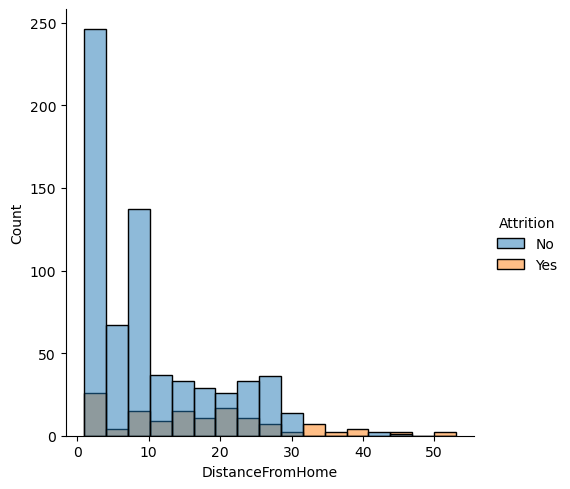

In [130]:
sns.displot(x='DistanceFromHome',hue='Attrition',data=df)

In [131]:
#40% employee quit their job because distance from home is more then 10
round(((df[(df['Attrition']=='Yes') & (df['DistanceFromHome']>10)].shape[0]/df[df['Attrition']=='Yes'].shape[0])*100),2)

66.42

Married     339
Single      278
Divorced    178
Name: MaritalStatus, dtype: int64


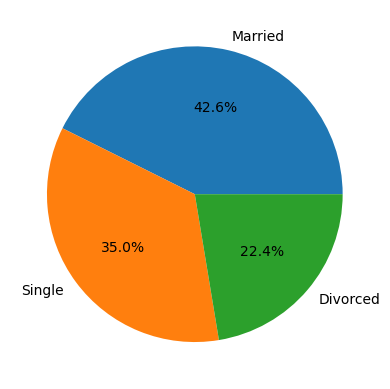

In [132]:
m=df['MaritalStatus'].value_counts()
print(m)
plt.pie(m,labels=['Married', 'Single', 'Divorced'],autopct='%1.1f%%')
plt.show()

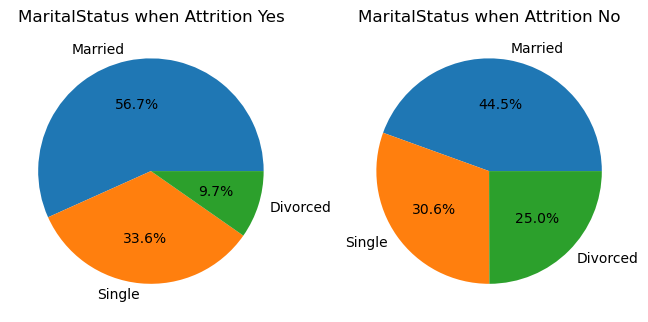

In [133]:

A_yes=df[df['Attrition']=='Yes']
A_no=df[df['Attrition']=='No']
myes=A_yes['MaritalStatus'].value_counts()
mno=A_no['MaritalStatus'].value_counts()
plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.pie(myes,labels=['Married', 'Single', 'Divorced'],autopct='%1.1f%%')
plt.title('MaritalStatus when Attrition Yes')
plt.subplot(1, 2, 2)
plt.title('MaritalStatus when Attrition No')
plt.pie(mno,labels=['Married', 'Single', 'Divorced'],autopct='%1.1f%%')
plt.show()

#Single and Married people are more likely to leave the company

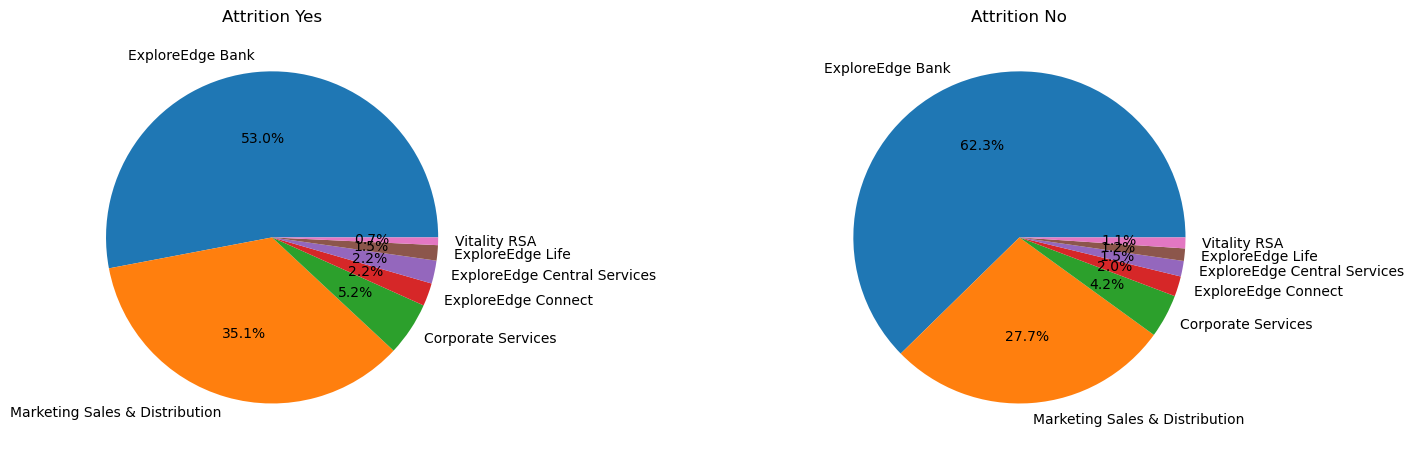

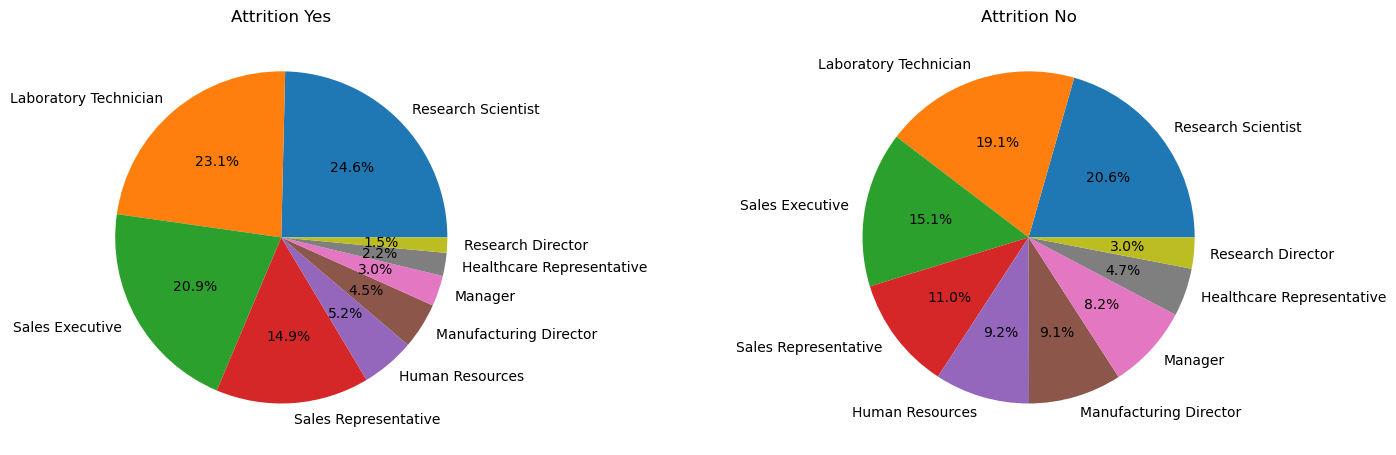

In [134]:
def plotpie(x,xsize,ysize):
    A_yes=df[df['Attrition']=='Yes']
    A_no=df[df['Attrition']=='No']
    myes=A_yes[x].value_counts()
    mno=A_no[x].value_counts()
    plt.figure(figsize=(xsize,ysize))
    plt.subplots_adjust(wspace=0.8, hspace=0.7)
    plt.subplot(1, 2, 1)
    plt.pie(myes,labels=myes.index,autopct='%1.1f%%')
    plt.title('Attrition Yes')
    plt.subplot(1, 2, 2)
    plt.pie(mno,labels=myes.index,autopct='%1.1f%%')
    plt.title('Attrition No')

    plt.show()
    
for i in ['Department','JobRole']:
    plotpie(i,15,15)

In [135]:
#no correlation between RelationshipSatisfaction and Attrition
#plotpie('RelationshipSatisfaction',10,10)

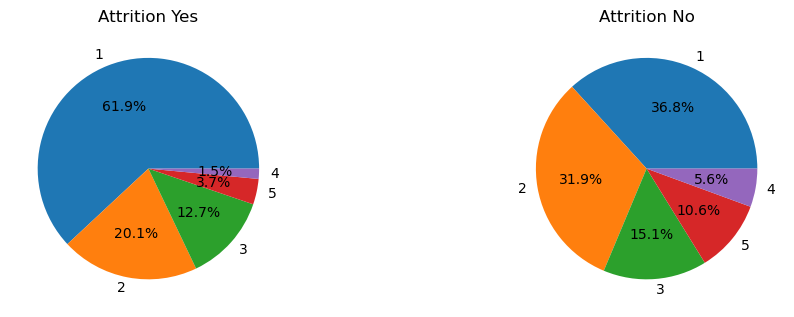

In [136]:
plotpie('JobLevel',10,10)
#Employees may be more inclined to consider leaving if they ares working at a lower level within their job role

# Feature Engineering and Scaling

In [137]:
from sklearn.preprocessing import MinMaxScaler

In [138]:
df.head()

,Age,WorkModel,DailyRate,Department,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,50.0,High-flex Hybrid,1246.0,Corporate Services,12.0,3,1,Male,5,Manager,2,Single,18200,1,No,11,3,1,32,2,3,32,5,10,7,No
1,34.0,Remote,829.0,Corporate Services,45.0,2,3,Male,1,Human Resources,4,Single,3737,0,No,19,3,1,4,1,1,3,2,0,2,No
3,51.0,Remote,770.0,Corporate Services,20.0,3,3,Male,4,Manager,2,Divorced,14026,1,Yes,11,3,1,33,2,3,33,9,0,10,No
6,30.0,Remote,1240.0,Corporate Services,9.0,3,3,Male,2,Human Resources,4,Married,6347,0,Yes,19,3,0,12,2,1,11,9,4,7,No
7,36.0,Remote,1041.0,Corporate Services,13.0,3,3,Male,1,Human Resources,2,Married,2143,4,No,13,3,1,8,2,3,5,2,0,4,No


In [139]:
obj=df.select_dtypes('object')
num=df.select_dtypes(['int64','float64'])

In [140]:
obj.head()

,WorkModel,Department,Gender,JobRole,MaritalStatus,OverTime,Attrition
0,High-flex Hybrid,Corporate Services,Male,Manager,Single,No,No
1,Remote,Corporate Services,Male,Human Resources,Single,No,No
3,Remote,Corporate Services,Male,Manager,Divorced,Yes,No
6,Remote,Corporate Services,Male,Human Resources,Married,Yes,No
7,Remote,Corporate Services,Male,Human Resources,Married,No,No


In [141]:
num.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,50.0,1246.0,12.0,3,1,5,2,18200,1,11,3,1,32,2,3,32,5,10,7
1,34.0,829.0,45.0,2,3,1,4,3737,0,19,3,1,4,1,1,3,2,0,2
3,51.0,770.0,20.0,3,3,4,2,14026,1,11,3,1,33,2,3,33,9,0,10
6,30.0,1240.0,9.0,3,3,2,4,6347,0,19,3,0,12,2,1,11,9,4,7
7,36.0,1041.0,13.0,3,3,1,2,2143,4,13,3,1,8,2,3,5,2,0,4


In [142]:
obj=pd.get_dummies(obj,drop_first=True)
obj.head()

,WorkModel_Fully Remote,WorkModel_Fully office based,WorkModel_High-flex Hybrid,WorkModel_Low - flex hybrid,WorkModel_Medium-flex Hybrid,WorkModel_Remote,Department_ExploreEdge Bank,Department_ExploreEdge Central Services,Department_ExploreEdge Connect,Department_ExploreEdge Life,Department_Marketing Sales & Distribution,Department_Vitality RSA,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,Attrition_Yes
0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
6,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0
7,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0


<Axes: >

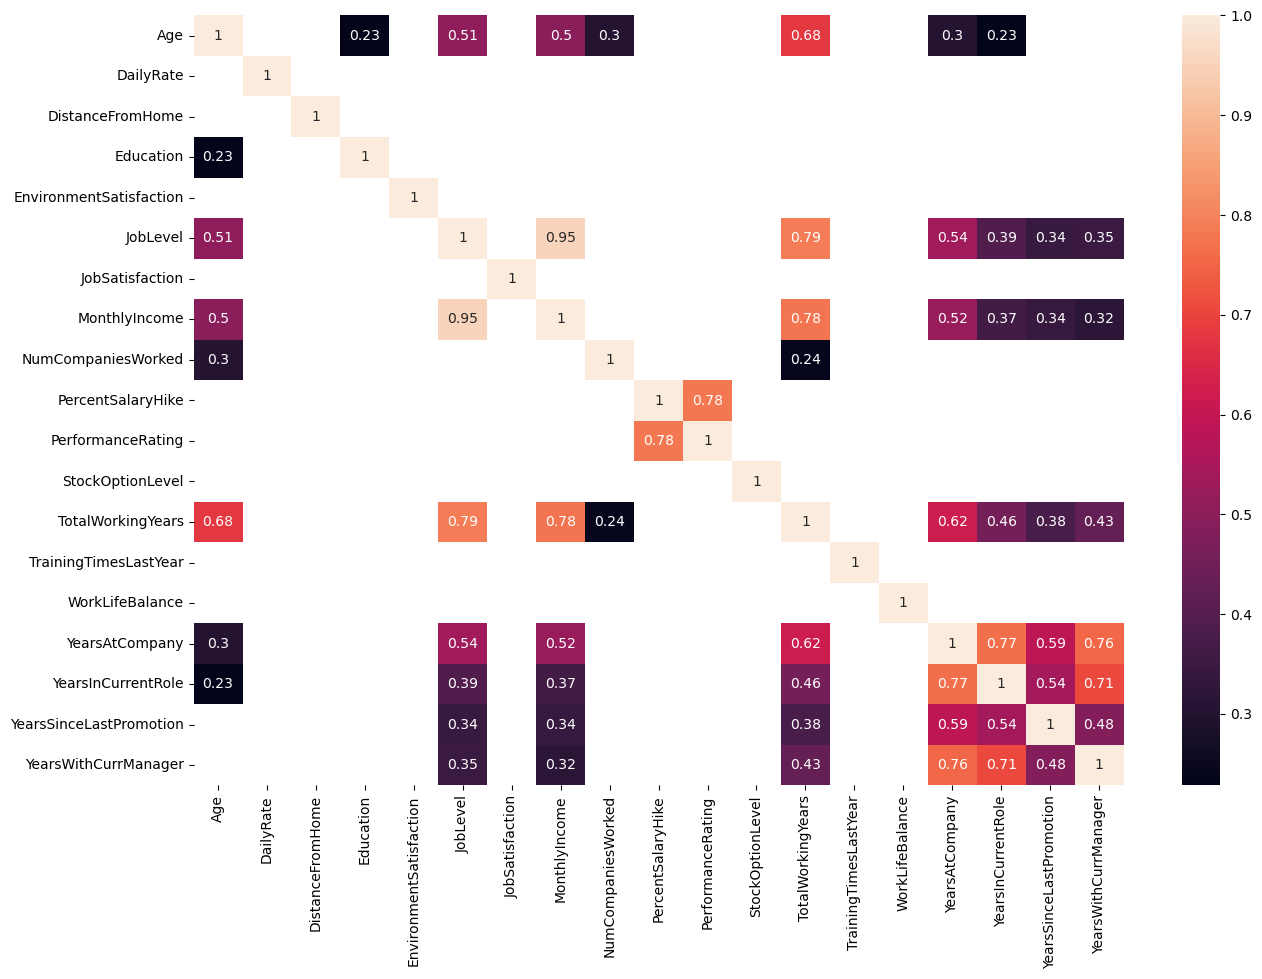

In [143]:
d=num.corr()
plt.figure(figsize=(15,10))
sns.heatmap(d[(d>0.2) | (d<-0.2)],annot=True)

In [144]:
mm=MinMaxScaler()
numScale=mm.fit_transform(num)
num=pd.DataFrame(numScale,columns=num.columns)
num.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.761905,0.821249,0.211538,0.50,0.000000,1.00,0.333333,0.905266,0.111111,0.000000,0.0,0.333333,0.800,0.333333,0.666667,0.864865,0.277778,0.666667,0.411765
1,0.380952,0.521895,0.846154,0.25,0.666667,0.00,1.000000,0.143655,0.000000,0.571429,0.0,0.333333,0.100,0.166667,0.000000,0.081081,0.111111,0.000000,0.117647
2,0.785714,0.479541,0.365385,0.50,0.666667,0.75,0.333333,0.685466,0.111111,0.000000,0.0,0.333333,0.825,0.333333,0.666667,0.891892,0.500000,0.000000,0.588235
3,0.285714,0.816942,0.153846,0.50,0.666667,0.25,1.000000,0.281095,0.000000,0.571429,0.0,0.000000,0.300,0.333333,0.000000,0.297297,0.500000,0.266667,0.411765
4,0.428571,0.674085,0.230769,0.50,0.666667,0.00,0.333333,0.059716,0.444444,0.142857,0.0,0.333333,0.200,0.333333,0.666667,0.135135,0.111111,0.000000,0.235294


In [145]:
final = pd.concat([obj.reset_index(drop=True),num.reset_index(drop=True)], axis=1)

In [146]:
final.head()

,WorkModel_Fully Remote,WorkModel_Fully office based,WorkModel_High-flex Hybrid,WorkModel_Low - flex hybrid,WorkModel_Medium-flex Hybrid,WorkModel_Remote,Department_ExploreEdge Bank,Department_ExploreEdge Central Services,Department_ExploreEdge Connect,Department_ExploreEdge Life,Department_Marketing Sales & Distribution,Department_Vitality RSA,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,Attrition_Yes,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0.761905,0.821249,0.211538,0.50,0.000000,1.00,0.333333,0.905266,0.111111,0.000000,0.0,0.333333,0.800,0.333333,0.666667,0.864865,0.277778,0.666667,0.411765
1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0.380952,0.521895,0.846154,0.25,0.666667,0.00,1.000000,0.143655,0.000000,0.571429,0.0,0.333333,0.100,0.166667,0.000000,0.081081,0.111111,0.000000,0.117647
2,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0.785714,0.479541,0.365385,0.50,0.666667,0.75,0.333333,0.685466,0.111111,0.000000,0.0,0.333333,0.825,0.333333,0.666667,0.891892,0.500000,0.000000,0.588235
3,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0.285714,0.816942,0.153846,0.50,0.666667,0.25,1.000000,0.281095,0.000000,0.571429,0.0,0.000000,0.300,0.333333,0.000000,0.297297,0.500000,0.266667,0.411765
4,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0.428571,0.674085,0.230769,0.50,0.666667,0.00,0.333333,0.059716,0.444444,0.142857,0.0,0.333333,0.200,0.333333,0.666667,0.135135,0.111111,0.000000,0.235294


# Model Building

In [147]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler,SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

<Axes: xlabel='Attrition_Yes', ylabel='count'>

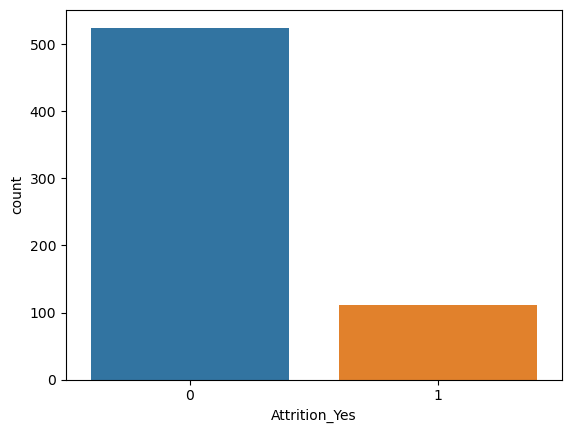

In [148]:
x=final.drop(['Attrition_Yes'],axis=1)
y=final['Attrition_Yes']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
sns.countplot(x=y_train)

In [149]:
sm=SMOTE(sampling_strategy=0.5)
x_train,y_train=sm.fit_resample(x_train,y_train)
us=RandomUnderSampler(sampling_strategy=0.5)
x_train,y_train=us.fit_resample(x_train,y_train)

<Axes: xlabel='Attrition_Yes', ylabel='count'>

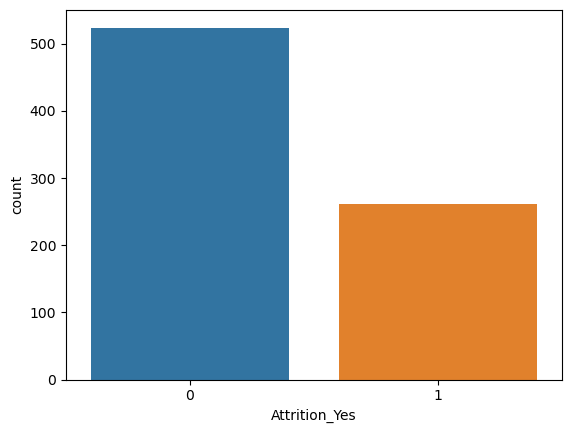

In [150]:
sns.countplot(x=y_train)

In [151]:
models = {
    "Logistic regression":LogisticRegression(),
    "Tree ":DecisionTreeClassifier(),
    "Ensambled":RandomForestClassifier(),
    "xg":xgb.XGBClassifier(),
    'SVC':SVC(),
    'KNN':KNeighborsClassifier(),
}
for name,model in models.items():
    model.fit(x_train,y_train)
    p = model.predict(x_test)  
    print("Model: " , name)
    print("------------------------------")    
    print(classification_report(y_test,p))
    print(".........................................................|")

Model:  Logistic regression
------------------------------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       136
           1       0.96      0.96      0.96        23

    accuracy                           0.99       159
   macro avg       0.97      0.97      0.97       159
weighted avg       0.99      0.99      0.99       159

.........................................................|
Model:  Tree 
------------------------------
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       136
           1       0.88      1.00      0.94        23

    accuracy                           0.98       159
   macro avg       0.94      0.99      0.96       159
weighted avg       0.98      0.98      0.98       159

.........................................................|
Model:  Ensambled
------------------------------
              precision    recall  f1-score   support

           0       0

In [152]:
param_grid = { 
    'C':[1, 10, 100, 1000],
    'penalty':['none', 'elasticnet', 'l1', 'l2'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

classifier = LogisticRegression()

grid_search = GridSearchCV(classifier, param_grid, cv=5)

grid_search.fit(x_train, y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
0.9987261146496815


In [153]:
y_pred = grid_search.best_estimator_.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       136
           1       0.96      1.00      0.98        23

    accuracy                           0.99       159
   macro avg       0.98      1.00      0.99       159
weighted avg       0.99      0.99      0.99       159

